In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------


# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler# para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 
from category_encoders import TargetEncoder
# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
# pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("../../../")
import src.soporte_clustering as sc


In [2]:
df = pd.read_pickle("../../../datos/01_clustering/03_datos_estandarizados.pkl")

In [10]:
df.sample()

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
Product ID,,,,,,,,,,,,,
TEC-SAM-10002682,-1.137008,0.0,-16.57,0.070889,-1.0,0.0,-0.047949,-0.666667,0.0,-0.008965,0.372711,-1.0,1


# Modelo Kmeans

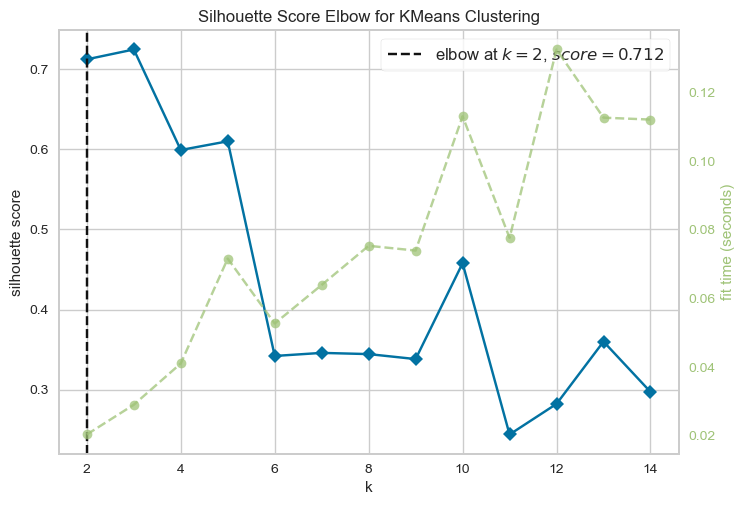

In [7]:
kmeans = sc.Clustering(df)
kmeans.sacar_clusters_kmeans()

# Dividir en 2 Grupos

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.712361,0.424106,41290
1,0.712361,0.424106,10000


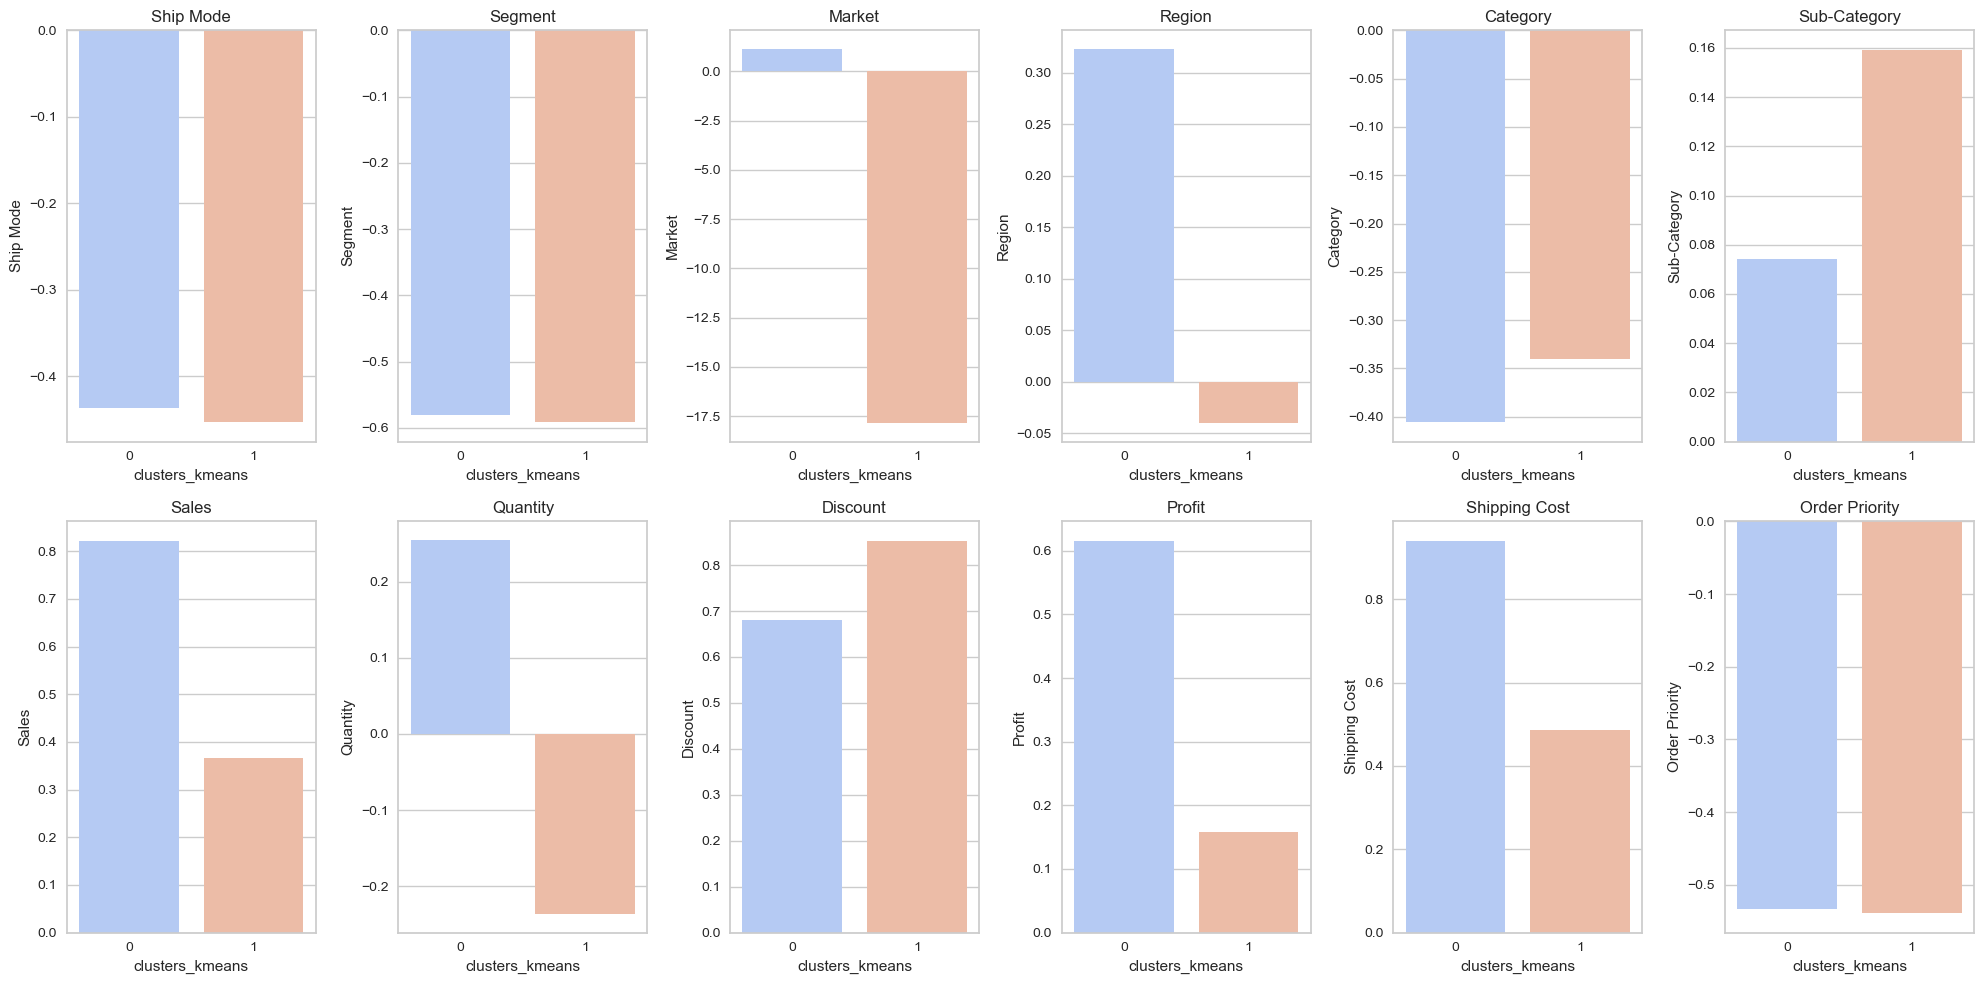

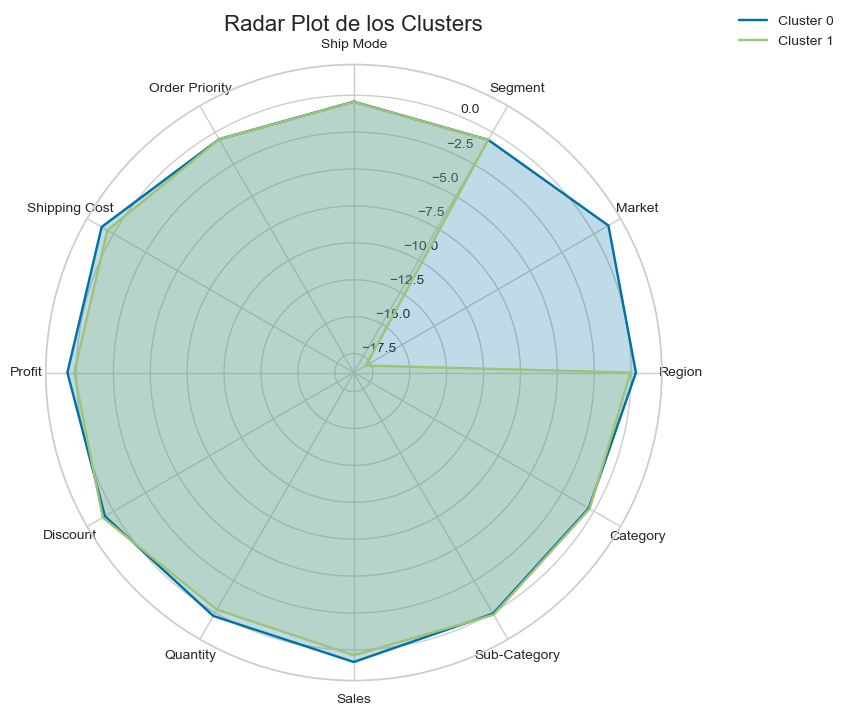

<Figure size 800x550 with 0 Axes>

In [16]:
df, labels = kmeans.modelo_kmeans(df,2,metricas=True,graficas=True)

In [15]:
kmeans_df = df.copy()
kmeans_df

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
Product ID,,,,,,,,,,,,,
TEC-AC-10003033,-1.371738,0.000000,-0.020000,-0.562754,-1.00000,-0.114727,10.098283,1.333333,0.0,20.454890,42.389194,-1.83039,2
FUR-CH-10003950,-1.000000,-1.000000,3.340000,-0.377106,-1.01254,0.031326,16.452253,2.000000,0.5,-8.095762,41.934066,-1.83039,2
TEC-PH-10004664,-1.137008,0.000000,3.340000,-0.377106,-1.00000,0.000000,23.105962,2.000000,0.5,24.741402,41.561355,0.00000,2
TEC-PH-10004583,-1.137008,-1.548832,0.000000,1.839628,-1.00000,0.000000,12.744104,0.666667,0.5,-2.873676,41.317308,0.00000,2
TEC-SHA-10000501,-1.371738,0.000000,-18.043333,-0.057525,-1.00000,-0.461351,12.473784,1.666667,0.0,8.211899,40.991300,-1.83039,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
OFF-FA-10000746,-1.371738,-1.000000,3.340000,-0.710924,0.00000,-0.381204,-0.090574,0.666667,0.0,-0.128769,-0.356227,0.00000,0
OFF-AP-10002906,0.000000,0.000000,-0.020000,1.839628,0.00000,-0.651749,-0.384072,-0.666667,4.0,-0.281174,-0.356227,0.00000,0
OFF-EN-10001219,-1.371738,-1.548832,-0.020000,-0.459617,0.00000,-0.375102,-0.282045,0.000000,0.0,0.054083,-0.356227,-1.00000,0


# Método Aglomerativo

In [ ]:
# visualizamos los dendrogramas para saber que método de distancia es el mejor para nuestros datos
modelos = sc.Clustering(df)
modelos.visualizar_dendrogramas(grafica_size=(20,20),titulo_size=20)